<a href="https://colab.research.google.com/github/salahagnir/CA/blob/main/CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/CA MSc/Estimated Migration.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATISTIC Label         1998 non-null   object 
 1   Year                    1998 non-null   int64  
 2   Age Group               1998 non-null   object 
 3   Sex                     1998 non-null   object 
 4   Inward or Outward Flow  1998 non-null   object 
 5   UNIT                    1998 non-null   object 
 6   VALUE                   1683 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 109.4+ KB


In [ ]:
df1[['Age Group', 'Sex']] = df1[['Age Group', 'Sex']].astype('category')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   STATISTIC Label         1998 non-null   object  
 1   Year                    1998 non-null   int64   
 2   Age Group               1998 non-null   category
 3   Sex                     1998 non-null   category
 4   Inward or Outward Flow  1998 non-null   object  
 5   UNIT                    1998 non-null   object  
 6   VALUE                   1683 non-null   float64 
dtypes: category(2), float64(1), int64(1), object(3)
memory usage: 82.4+ KB


In [ ]:
df1.head(5)

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [ ]:
df1.tail()

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
1993,Estimated Migration (Persons in April),2023,65 years and over,Male,Emigrants: All destinations,Thousand,0.4
1994,Estimated Migration (Persons in April),2023,65 years and over,Male,Immigrants: All origins,Thousand,1.5
1995,Estimated Migration (Persons in April),2023,65 years and over,Female,Net migration,Thousand,1.8
1996,Estimated Migration (Persons in April),2023,65 years and over,Female,Emigrants: All destinations,Thousand,0.6
1997,Estimated Migration (Persons in April),2023,65 years and over,Female,Immigrants: All origins,Thousand,2.5


In [ ]:
df1.shape

(1998, 7)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   STATISTIC Label         1998 non-null   object  
 1   Year                    1998 non-null   int64   
 2   Age Group               1998 non-null   category
 3   Sex                     1998 non-null   category
 4   Inward or Outward Flow  1998 non-null   object  
 5   UNIT                    1998 non-null   object  
 6   VALUE                   1683 non-null   float64 
dtypes: category(2), float64(1), int64(1), object(3)
memory usage: 82.4+ KB


In [ ]:
df1.dtypes #Overview of data types of each columns in the datafraime

STATISTIC Label             object
Year                         int64
Age Group                 category
Sex                       category
Inward or Outward Flow      object
UNIT                        object
VALUE                      float64
dtype: object

In [ ]:
df1.describe()

,Year,VALUE
count,1998.000000,1683.000000
mean,2005.000000,10.856625
std,10.679751,17.070445
min,1987.000000,-43.900000
25%,1996.000000,1.200000
50%,2005.000000,4.500000
75%,2014.000000,14.000000
max,2023.000000,151.100000


In [ ]:
duplicate_rows_df = df1[df1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [ ]:
df1.isnull().sum()

STATISTIC Label             0
Year                        0
Age Group                   0
Sex                         0
Inward or Outward Flow      0
UNIT                        0
VALUE                     315
dtype: int64

<Axes: >

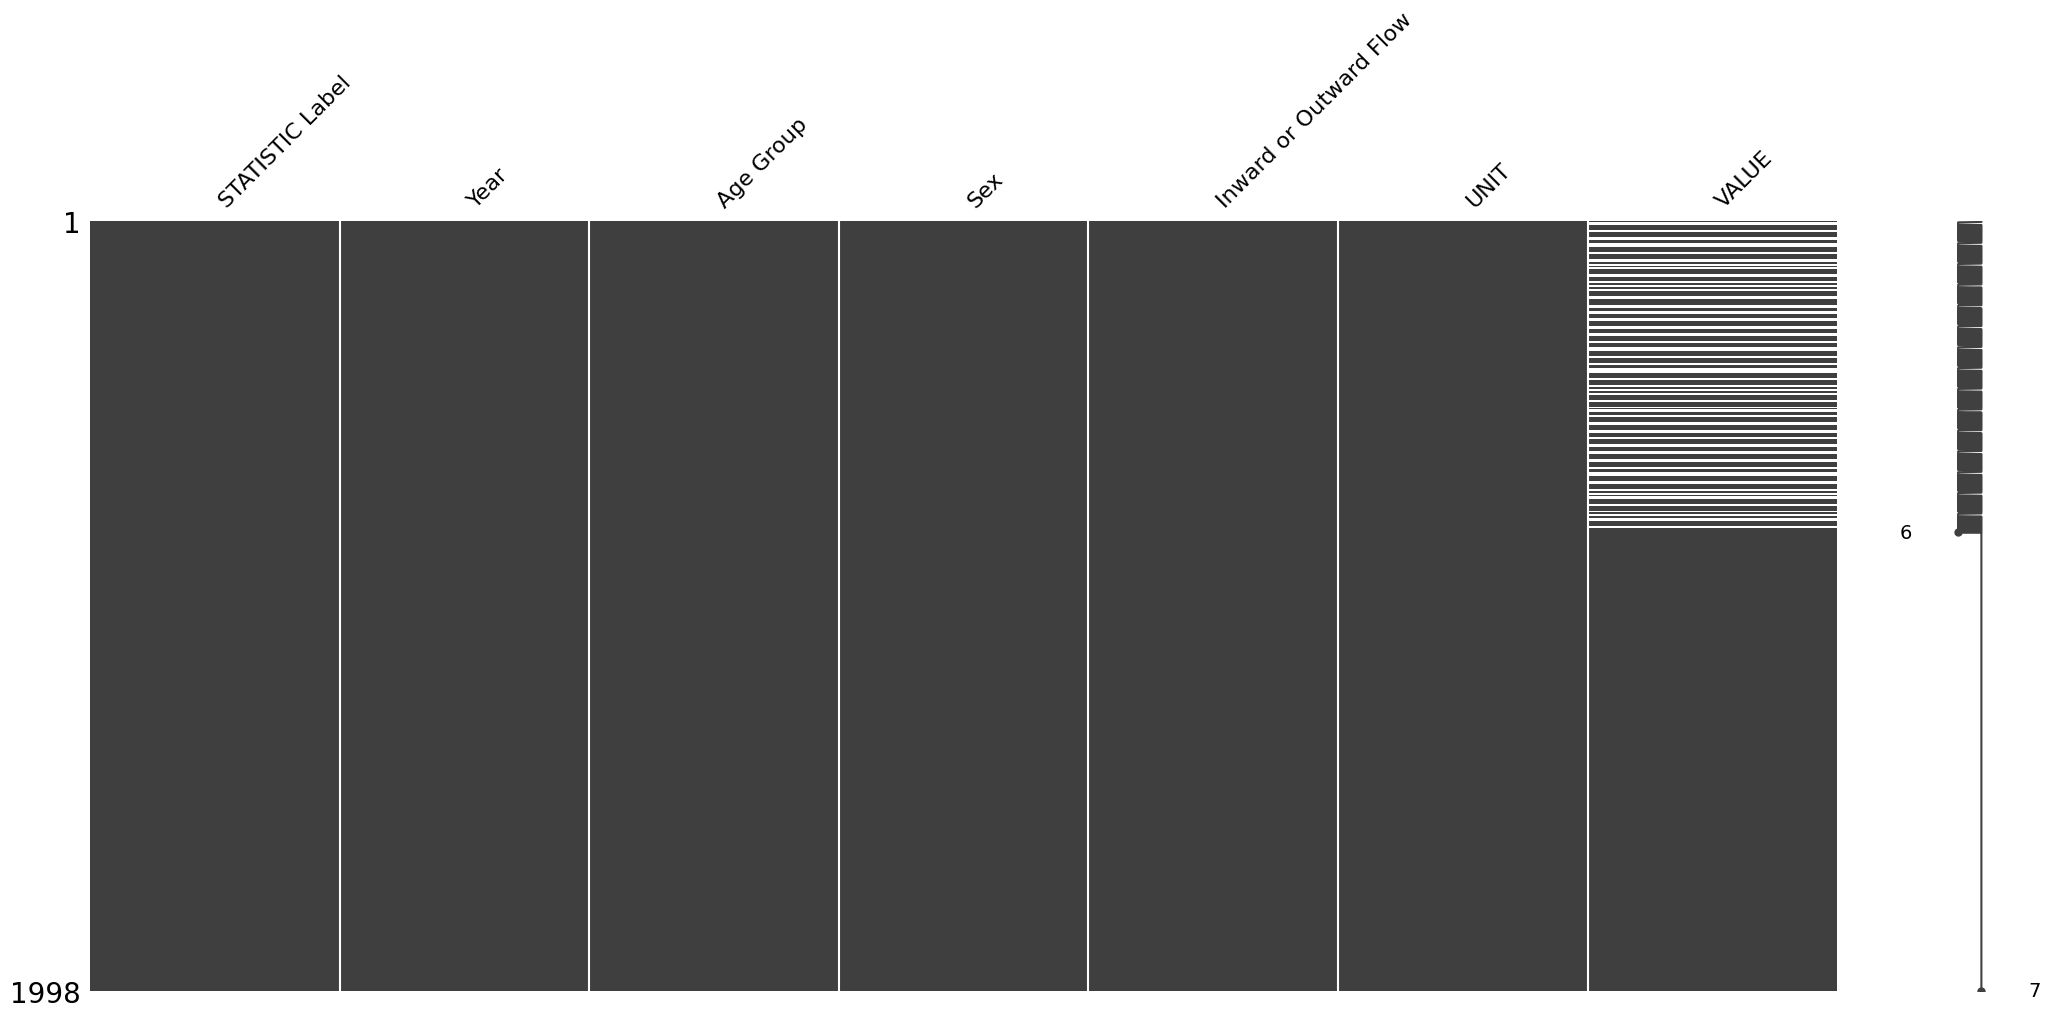

In [ ]:
import missingno as msno
msno.matrix(df1)

In [ ]:
df1=df1.fillna(0)

In [ ]:
df1.isnull().sum()    # now the missing value issue is solved

STATISTIC Label           0
Year                      0
Age Group                 0
Sex                       0
Inward or Outward Flow    0
UNIT                      0
VALUE                     0
dtype: int64

In [ ]:
df=df1.drop(["STATISTIC Label","UNIT"],axis=1)

In [ ]:
df

,Year,Age Group,Sex,Inward or Outward Flow,VALUE
0,1987,All ages,Both sexes,Net migration,-23.0
1,1987,All ages,Both sexes,Emigrants: All destinations,40.2
2,1987,All ages,Both sexes,Immigrants: All origins,17.2
3,1987,All ages,Male,Net migration,0.0
4,1987,All ages,Male,Emigrants: All destinations,0.0
...,...,...,...,...,...
1993,2023,65 years and over,Male,Emigrants: All destinations,0.4
1994,2023,65 years and over,Male,Immigrants: All origins,1.5
1995,2023,65 years and over,Female,Net migration,1.8
1996,2023,65 years and over,Female,Emigrants: All destinations,0.6


In [ ]:
df[df.VALUE==df.VALUE.max()]

,Year,Age Group,Sex,Inward or Outward Flow,VALUE
1082,2007,All ages,Both sexes,Immigrants: All origins,151.1


<Axes: xlabel='VALUE'>

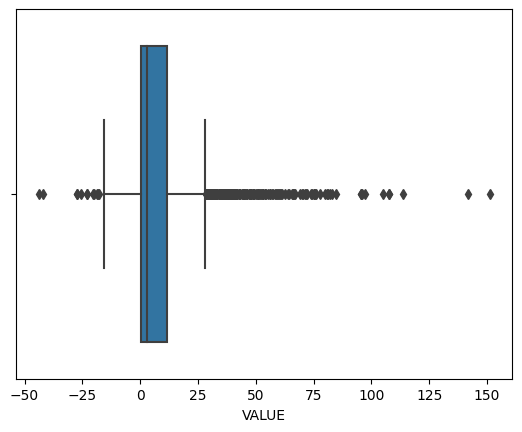

In [ ]:
sns.boxplot(x=df['VALUE'])

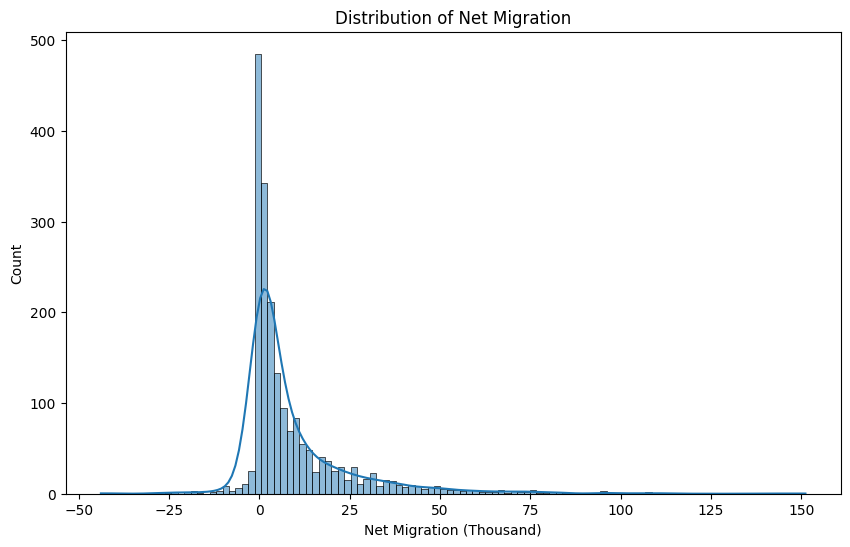

In [ ]:
# Data Visualization
# 1. Distribution of Net Migration
plt.figure(figsize=(10, 6))
sns.histplot(df['VALUE'], kde=True)
plt.xlabel('Net Migration (Thousand)')
plt.title('Distribution of Net Migration')
plt.show()

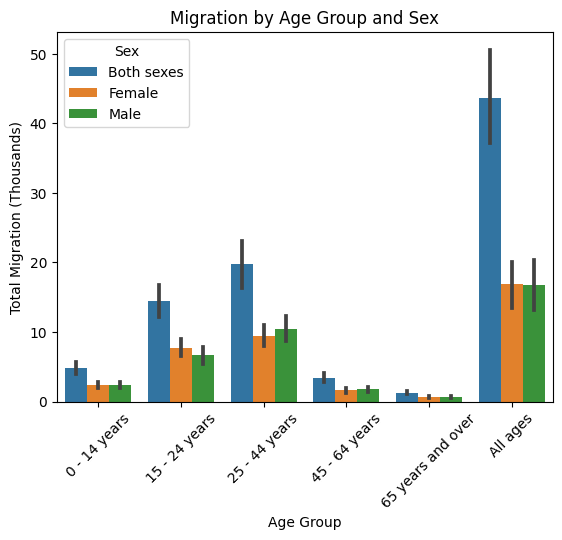

In [ ]:
sns.barplot(data=df, x='Age Group', y='VALUE', hue='Sex')
plt.xlabel('Age Group')
plt.ylabel('Total Migration (Thousands)')
plt.title('Migration by Age Group and Sex')
plt.xticks(rotation=45)
plt.show()

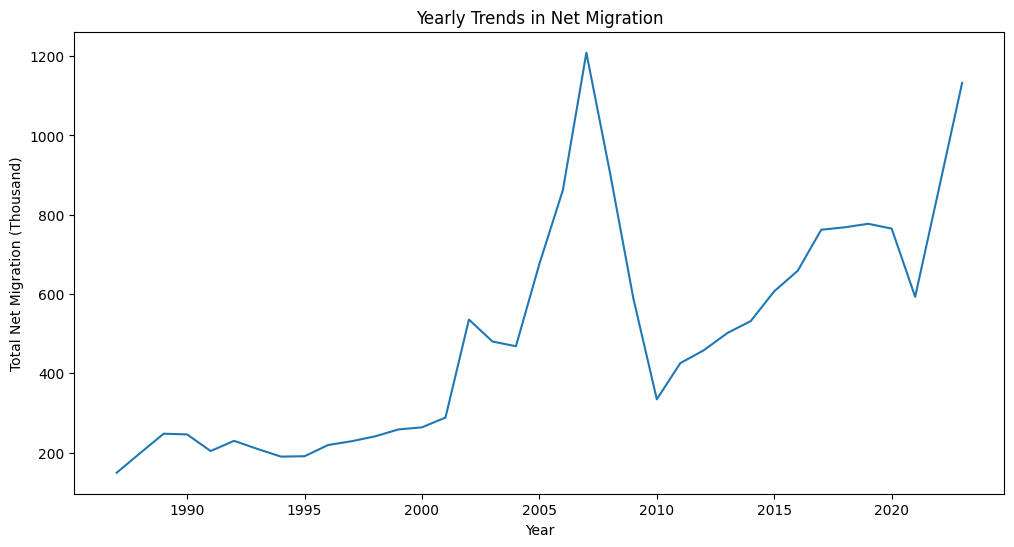

In [ ]:
# 4. Yearly Trends
yearly_data = df.groupby('Year')['VALUE'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_data.index, y=yearly_data.values)
plt.xlabel('Year')
plt.ylabel('Total Net Migration (Thousand)')
plt.title('Yearly Trends in Net Migration')
plt.show()

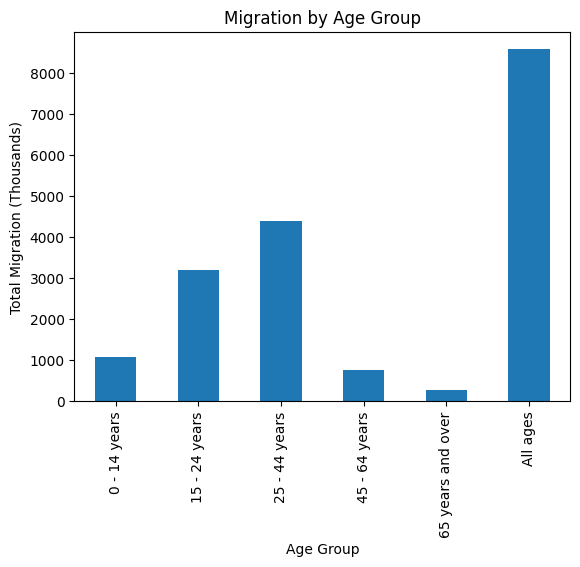

In [ ]:
age_group_data = df.groupby('Age Group')['VALUE'].sum()
age_group_data.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Total Migration (Thousands)')
plt.title('Migration by Age Group')
plt.show()

In [ ]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Age Group', 'Sex', 'Inward or Outward Flow'])

In [ ]:
df

,Year,VALUE,Age Group_0 - 14 years,Age Group_15 - 24 years,Age Group_25 - 44 years,Age Group_45 - 64 years,Age Group_65 years and over,Age Group_All ages,Sex_Both sexes,Sex_Female,Sex_Male,Inward or Outward Flow_Emigrants: All destinations,Inward or Outward Flow_Immigrants: All origins,Inward or Outward Flow_Net migration
0,1987,-23.0,0,0,0,0,0,1,1,0,0,0,0,1
1,1987,40.2,0,0,0,0,0,1,1,0,0,1,0,0
2,1987,17.2,0,0,0,0,0,1,1,0,0,0,1,0
3,1987,0.0,0,0,0,0,0,1,0,0,1,0,0,1
4,1987,0.0,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2023,0.4,0,0,0,0,1,0,0,0,1,1,0,0
1994,2023,1.5,0,0,0,0,1,0,0,0,1,0,1,0
1995,2023,1.8,0,0,0,0,1,0,0,1,0,0,0,1
1996,2023,0.6,0,0,0,0,1,0,0,1,0,1,0,0


In [ ]:
#Fast ADA

In [118]:
!pip install klib

In [119]:
import klib

In [120]:
df = pd.read_csv('/content/drive/MyDrive/CA MSc/Estimated Migration.csv')

GridSpec(6, 6)

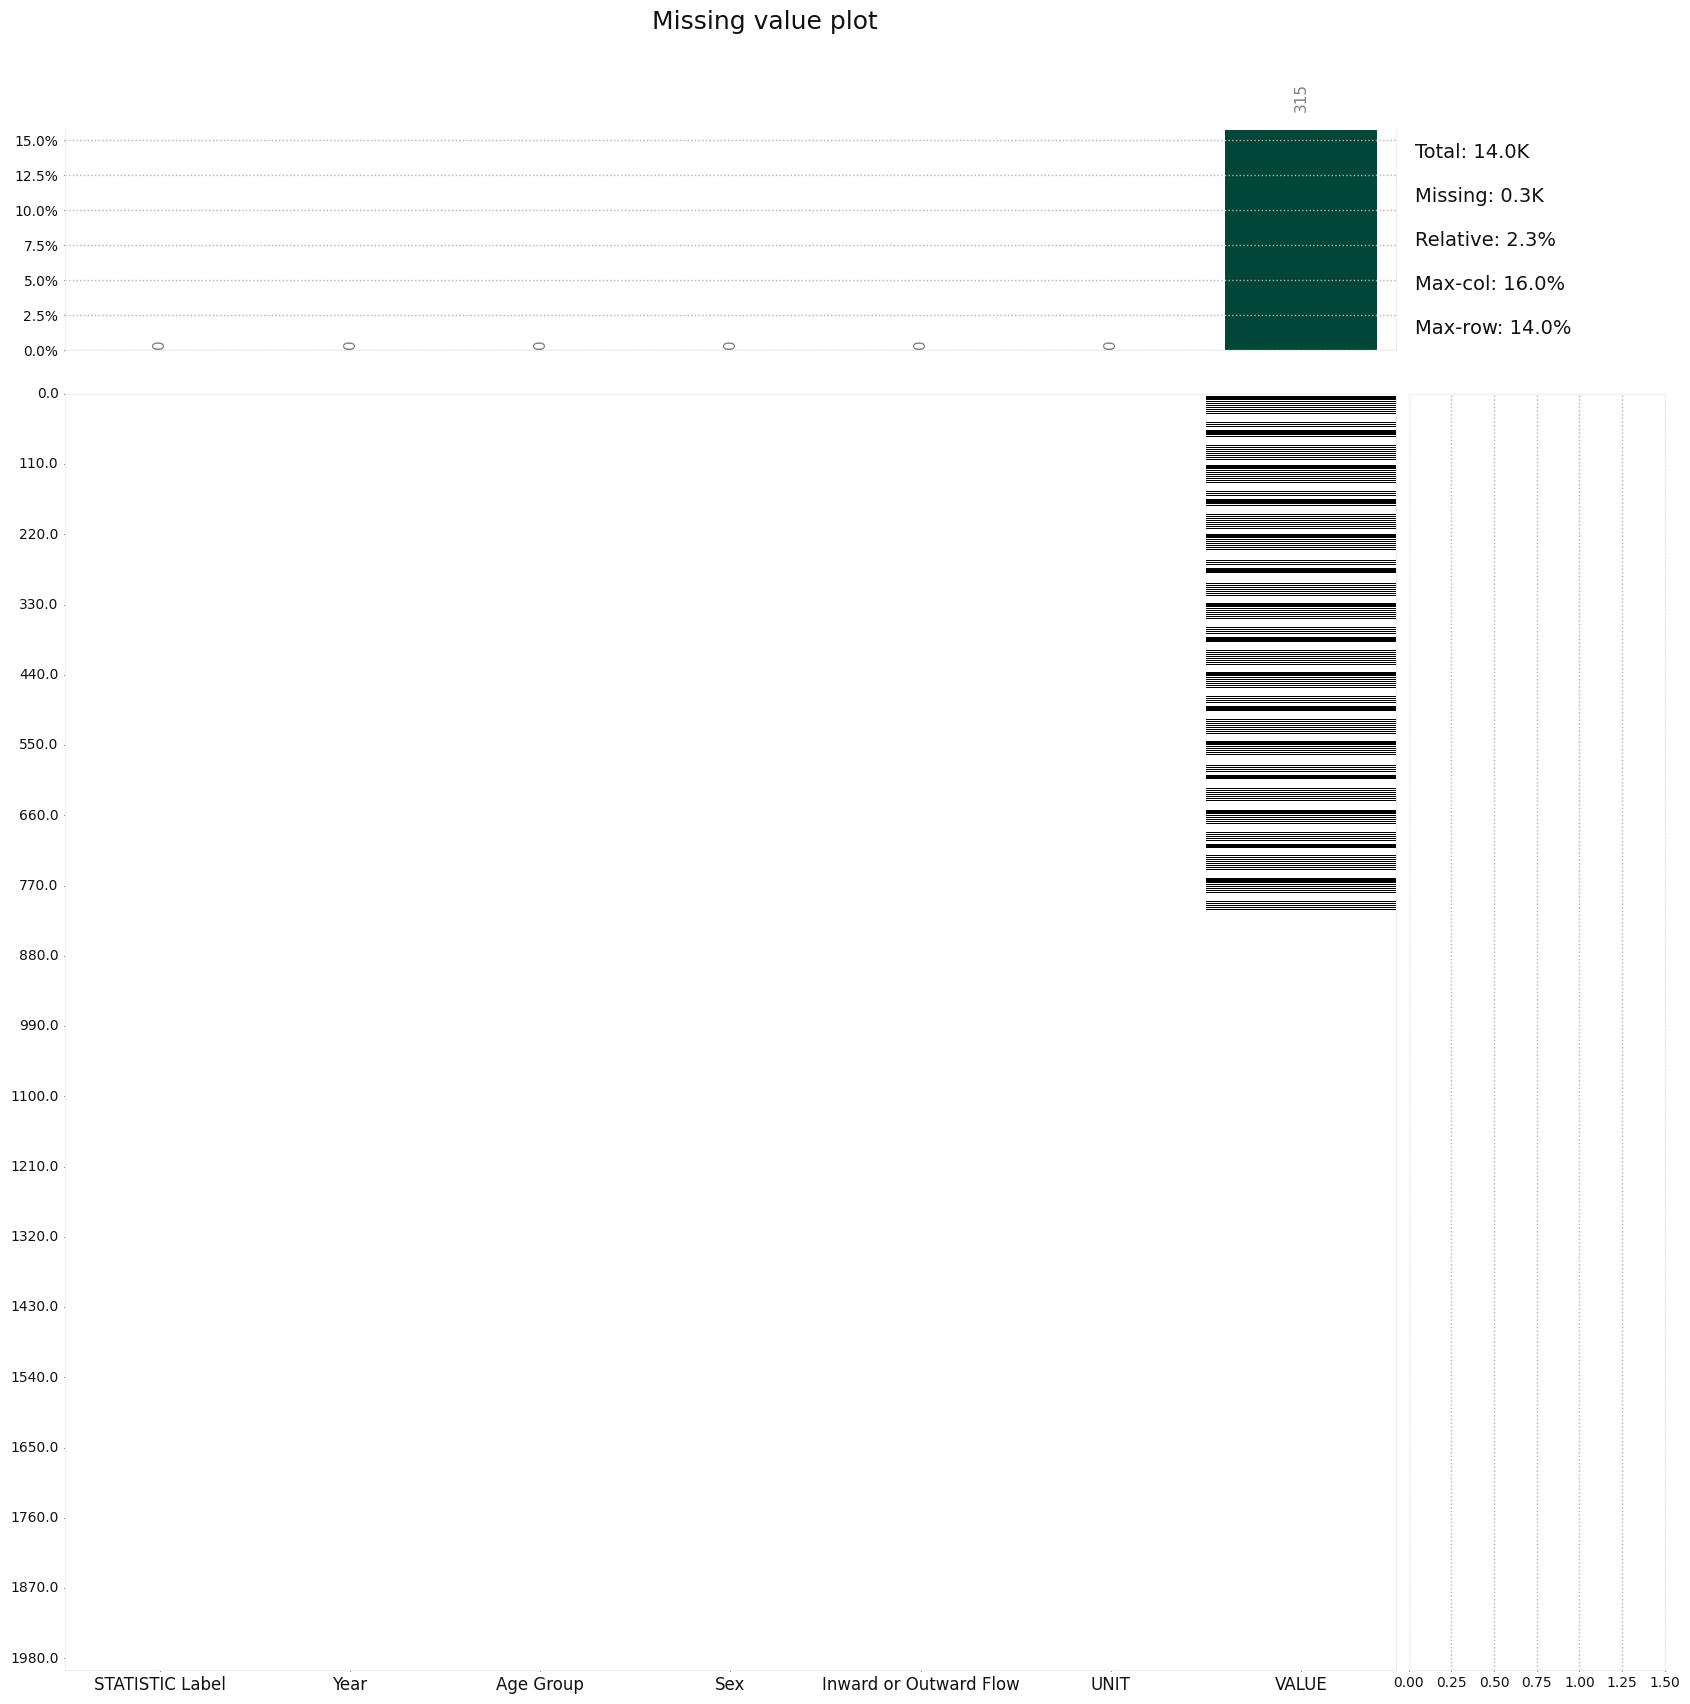

In [122]:
klib.missingval_plot(df)

In [123]:
df_cleaned = klib.data_cleaning(df)

Shape of cleaned data: (1998, 5) - Remaining NAs: 315


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 2
     of which 2 single valued.     Columns: ['statistic_label', 'unit']
Dropped missing values: 0
Reduced memory by at least: 0.09 MB (-81.82%)



<Axes: title={'center': 'Feature-correlation (pearson)'}>

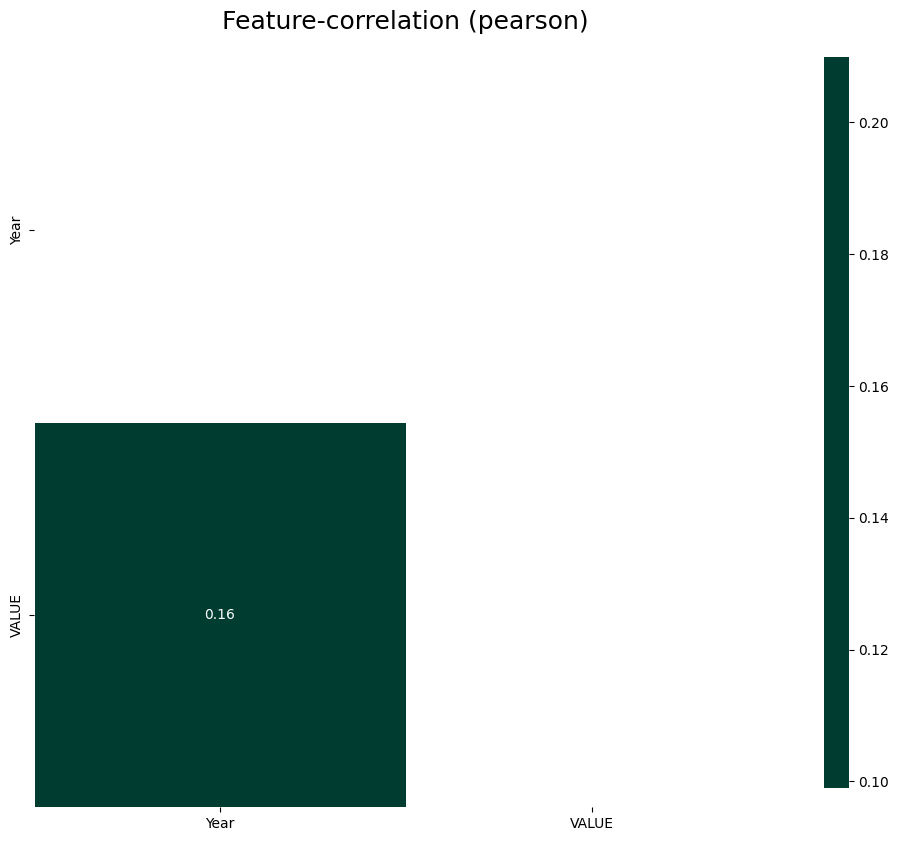

In [125]:
klib.corr_plot(df)